# Traveling Salesman Problem (TSP) Project
# Defining distances matrix (An Upper triangular matrix):

In [7]:
#Force reset all variables

%reset -f 
%matplotlib inline

import time
import math
import numpy as np
from sys import maxsize 
from itertools import permutations
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.pyplot as plt

def Distances_Matrix(x,y):
    D=np.zeros((v,v))
    for i in range(v):
        for j in range(v):
            if j>i:
                D[i,j]=int(math.sqrt((x[i]-x[j])**2 + (y[i]-y[j])**2)+.5)
                D[j,i]=D[i,j]
    return D
def calculate_min_spanning_tree_length(x, y):
    # Create a graph
    G = nx.Graph()

    # Add nodes to the graph
    for i in range(len(x)):
        G.add_node(i, pos=(x[i], y[i]))

    # Add edges based on the Euclidean distance between points
    for i in range(len(x)):
        for j in range(i + 1, len(x)):
            distance = ((x[i] - x[j]) ** 2 + (y[i] - y[j]) ** 2) ** 0.5
            G.add_edge(i, j, weight=distance)

    # Calculate the minimum spanning tree
    min_spanning_tree = nx.minimum_spanning_tree(G)

    # Calculate the length of the minimum spanning tree
    length = sum([min_spanning_tree[u][v]['weight'] for u, v in min_spanning_tree.edges()])

    return length

def Dist_to_center(x,y, x_bar, y_bar):
    dcent = []
    for i in range(v):
        dcent.append(int(math.sqrt((x[i]-x_bar)**2 + (y[i]-y_bar)**2)+.5))
    return dcent

def Display_Verticies(x,y,x_bar, y_bar):
    plt.figure()
    plt.scatter(x,y, label='Cities')
    plt.scatter(x_bar,y_bar, color = 'r', label = 'Centroid')
    plt.grid()
    plt.legend()
    plt.show()
    
def connectpoints(x, y, indx, T):
    plt.figure()
    for j in range(v):
        x1, x2 = x[indx[j-1]], x[indx[j]]
        y1, y2 = y[indx[j-1]], y[indx[j]]
        plt.plot([x1, x2], [y1, y2], 'k-')
    plt.scatter(x,y)
    plt.scatter(x_bar,y_bar, color = 'r')
    plt.grid()
    plt.title(T)
    plt.show()

    
#Brute force Algorithm function   
    
def travellingSalesmanProblem(graph, s): 
    t3 = time.time() 
    # store all vertex apart from source vertex 
    vertex = [] 
    for i in range(v): 
        if i != s: 
            vertex.append(i) 
    mypath=()
    # store minimum weight Hamiltonian Cycle 
    min_path = maxsize 
    next_permutation=permutations(vertex)
    for i in next_permutation:
        # store current Path weight(cost) 
        current_pathweight = 0

        # compute current path weight 
        k = s 
        for j in i: 
            current_pathweight += graph[k][j] 
            k = j 
        current_pathweight += graph[k][s] 

        # update minimum 
        if current_pathweight <= min_path:
            mypath=i
        min_path = min(min_path, current_pathweight)


    mypath=list(mypath)
    mypath.insert(s,s)
    t4=time.time()
    timecost = t4 - t3
    return min_path, mypath, timecost
    
    
    
    
    
#Minimum spaning Tree Definition
def calculate_min_spanning_tree_length2(x, y):
    # Create a graph
    t1 = time.time()
    G = nx.Graph()

    # Add nodes to the graph
    for i in range(len(x)):
        G.add_node(i, pos=(x[i], y[i]))

    # Add edges based on the Euclidean distance between points
    for i in range(len(x)):
        for j in range(i + 1, len(x)):
            distance = ((x[i] - x[j]) ** 2 + (y[i] - y[j]) ** 2) ** 0.5
            G.add_edge(i, j, weight=distance)

    # Calculate the minimum spanning tree
    min_spanning_tree = nx.minimum_spanning_tree(G)

    # Calculate the length of the minimum spanning tree
    length = sum([min_spanning_tree[u][v]['weight'] for u, v in min_spanning_tree.edges()])
    t2=time.time()
    timecost = t2-t1
    return length, timecost, G, min_spanning_tree


# Draw the graph of the MST
def Draw_Network(G):
    pos = nx.get_node_attributes(G, 'pos')
    min_spanning_tree = nx.minimum_spanning_tree(G)
    nx.draw_networkx_nodes(G, pos, node_size=20)
    nx.draw_networkx_edges(G, pos, edgelist=min_spanning_tree.edges(), width=1.5, edge_color='gray')
    #nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')
    plt.title('Minimum Spanning Tree')
    #plt.axis('on')
    plt.grid()
    plt.show()
    
    
# Define the Nearest Neighbor Algorithm
def nearest_neighbor(Dist):
    t5=time.time()
    D = Dist.copy()
    routelist=[]
    n = len(D[0,:])
    currentStop = 0
    routeList = [0]
    for _i in range(n-1):
        D[:,currentStop] = v**2 *100000 # Set column of visited stop to very large number
        currentStop = np.argmin(D[currentStop,:])
        routelist.append(currentStop)
    routelist.insert(0,0)
    
    #Calculate the distance traveled
    summ8=0
    i=-1
    while i < len(routelist)-1:
        summ8+=Dist[routelist[i], routelist[i+1]]
        i+=1
    t6=time.time()
    timecost = t6-t5
    return summ8, timecost, routelist

# My Modification to the Nearest neighbor Algorithm
def NearestN_centric(x, y):
    visit = [m]
    count=0
    ind1=0
    ind2=0
    t5=time.time()
    for i in range(v-1):
        min1=np.inf
        min2=np.inf
        for j in range(v):
            if j not in visit:
                if D[visit[-1], j]<min1:
                    min1 =D[visit[-1], j]
                    ind1=j
                elif D[visit[-1], j]<min2:
                    min2 = D[visit[-1], j]
                    ind2 = j
        if dcent[ind1]>dcent[ind2]:
            visit.append(ind1)
        else:
            visit.append(ind1)
    
    #Calculate the distance traveled
    summ7=0
    i=-1
    while i < len(visit)-1:
        summ7+=D[visit[i], visit[i+1]]
        i+=1
    t6=time.time()
    timecost = t6-t5
    return summ7, timecost, visit

#Another modification to the Nearest neighbor algorithm:
# Define the Nearest Neighbor Algorithm
def nearest_neighbor_mod(Dist):
    t5=time.time()
    D = Dist.copy()
    k=Dist.copy()
    for j in range(v):
        for i in range(v):
            k[i, j] = (D[i,j]**2 - (dcent[j]**2))/v**2
    routelist=[]
    n = len(D[0,:])
    currentStop = 0
    routeList = [0]
    for i in range(n-1):
        k[:,currentStop] = v**2 *100000 # Set column of visited stop to very large number
        currentStop = np.argmin(k[currentStop,:])
        routelist.append(currentStop)
    routelist.insert(0,0)
    
    #Calculate the distance traveled
    summ8=0
    i=-1
    while i < len(routelist)-1:
        summ8+=Dist[routelist[i], routelist[i+1]]
        i+=1
    t6=time.time()
    timecost = t6-t5
    return summ8, timecost, routelist



#Christofides Algorithm ##Important
def Christofides(x,y):
    t9=time.time()
    #Identify the odd degree Nodes:
    odd_degree_nodes = [i for i in T.nodes if T.degree(i) %2]
    my_pos = { i : ( x[i], y[i] ) for i in range(v) }
    node_colors = [ T.degree(i) % 2 for i in T.nodes ]
    nx.draw(T, pos=my_pos, node_color=node_colors, node_size=20)


    # find a minimum-cost perfect matching over the odd-degree nodes
    for i,j in G.edges:
        G.edges[i,j]['neg_length'] = - G.edges[i,j]['weight']

    matching = nx.max_weight_matching( G.subgraph(odd_degree_nodes), maxcardinality=True, weight='neg_length')

    # create a multigraph with edge_set = (spanning tree edges) + (matching)
    M = nx.MultiGraph()

    M.add_nodes_from(range(v))

    M.add_edges_from(T.edges())
    M.add_edges_from(matching)

    

    # find an Eulerian cycle of the multigraph
    initial_tour = list ( nx.eulerian_circuit(M,source=0) )


    # take shortcuts (avoid repeated nodes)
    tour = [ 0 ]
    for (i,j) in initial_tour:
        if j not in tour:
            tour.append(j)



    #Calculating the Tour weight and comparing it to the MST:
    summ0=0
    i=-1
    while i < len(tour)-1:
        summ0+=D[tour[i], tour[i+1]]
        i+=1
    distCrhist = summ0
    t10 = time.time()
    timecost = t10-t9
    return distCrhist, timecost, tour



#Saving x and y data to separate files for the Anealing simulator:
def savex(x):
    filename = ('x.txt')
    f = open(filename, 'w')
    with open('x.txt', 'w') as f:
        for line in x:
            f.write(str(line))
            f.write('\n')
    f.close()
def savey(y):
    filename = ('y.txt')
    f = open(filename, 'w')
    with open('y.txt', 'w') as f:
        for line in y:
            f.write(str(line))
            f.write('\n')
    f.close()
def readanealing(name):
    filename = name
    ys=[]

    file = open(name, 'r')
    read = file.readline()
    for line in file:
        ys.append((line.strip()))
    file.close()
    return ys


# Add number of verticies and let RNG draw some verticies for you!

In [8]:
v=100
x=[]
y=[]
for i in range(v):
    x.append(int(200*np.random.rand()+.5))
    y.append(round(200*np.random.rand()+.5))
    
#Saving x and y into files
savex(x)
savey(y)
#Evaluating distances matrix
D = Distances_Matrix(x,y)
#finding the centroid
x_bar = np.average(x)
y_bar = np.average(y)
#evaluateing distances_to_centroid list
dcent = Dist_to_center(x,y, x_bar, y_bar)
#finding the index of the farthest point to the centroid
m=dcent.index(max(dcent))

# Visualize the points:

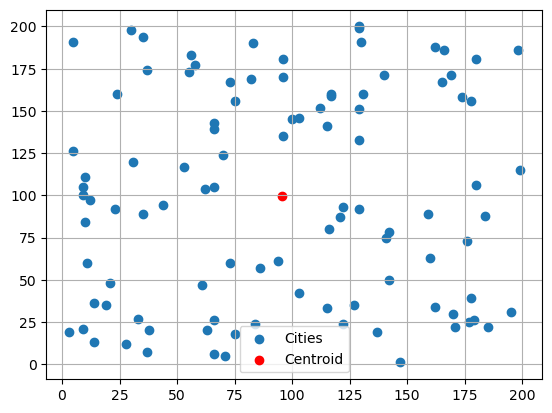

In [3]:
Display_Verticies(x,y,x_bar, y_bar)

# Brute Force abbroach
### (Only if the number of nodes less than 13)

Length of the minimum graph using exact method =  648.0
Order of points visited = [0, 8, 3, 9, 6, 1, 7, 4, 2, 5]
time cost to calculate minimum lenght using brute force = 2.221 seconds


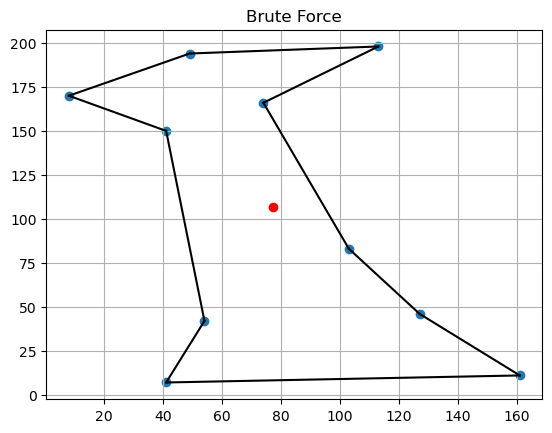

In [80]:
#The next if condition is to make sure not to burn the processor with the Brute force method if number of verticies > 13
if v<13:
    s = 0 #starting point
    min_path, mypath2, timecost=travellingSalesmanProblem(D, s)
    
    print('Length of the minimum graph using exact method = ', min_path)
    print('Order of points visited =', mypath2)
    print('time cost to calculate minimum lenght using brute force = %.3f seconds' %(timecost))
    connectpoints(x, y, mypath2, 'Brute Force')

# Calculating the Minimum Spaning Tree

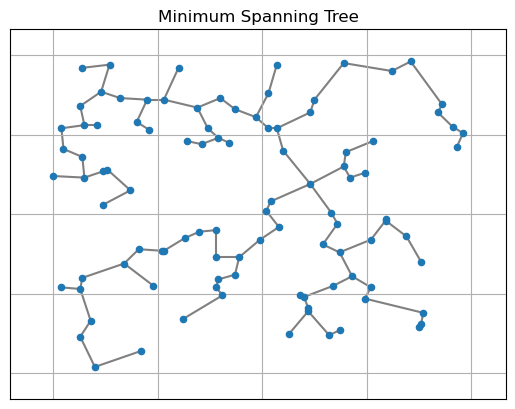

Length of the minimum spanning tree: 1240.3630021577496
Time cost to calculat the lenght of the minimum spaning tree = 0.025 seconds


In [9]:
min_spanning_tree_length , timecost2, G, T= calculate_min_spanning_tree_length2(x, y)
Draw_Network(G)
print("Length of the minimum spanning tree:", min_spanning_tree_length)
print('Time cost to calculat the lenght of the minimum spaning tree = %.3f seconds'%(timecost2))

# Nearest Neighbor (NN) Algorithm:

1821.0


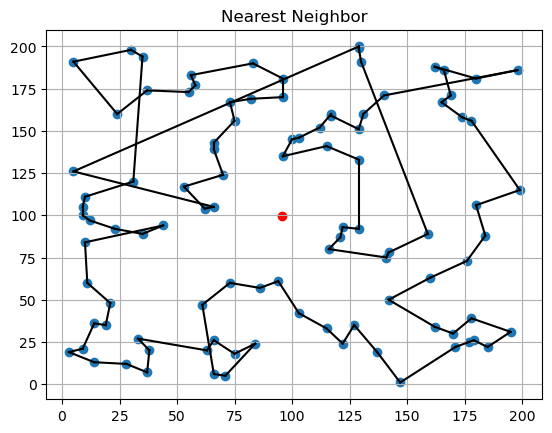

minimum lenght Actual (NN)= 1821.0
time cost to calculate minimum lenght using Modified NN = 0.001 seconds
Rleative error of NN method compared to MST= 29.3551 %


In [5]:
distNN, timecost7, visit7 = nearest_neighbor(D)
print(distNN)
connectpoints(x, y, visit7, 'Nearest Neighbor')
print('minimum lenght Actual (NN)=', distNN)
if v<14:
    print('Rleative error of NN method = %.1f %%'%(100*(distNN-min_path)/distNN))
print('time cost to calculate minimum lenght using Modified NN = %.3f seconds' %(timecost7))
print('Rleative error of NN method compared to MST= %.4f %%'%(100*(distNN-calculate_min_spanning_tree_length(x, y))/distNN))


# Modification 1: Opt(N2N & Off center)

minimum lenght (NN)= 1845.0
time cost to calculate minimum lenght using Modified NN = 0.011 seconds
Rleative error of NN method compared to MST= 23.5951 %


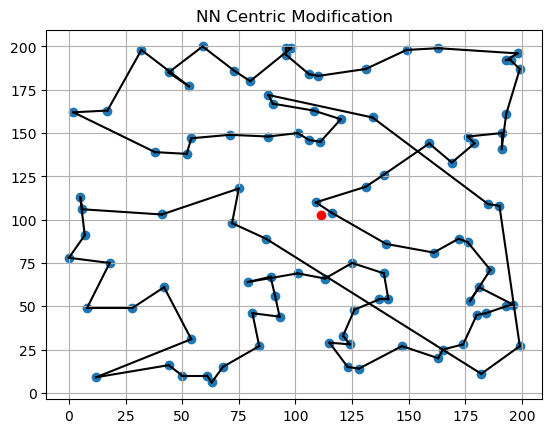

In [93]:
distanceNNcent , timecost4, visit = NearestN_centric(x, y)
print('minimum lenght (NN)=', distanceNNcent)
if v<14:
    print('Rleative error of NN method = %.1f %%'%(100*(distanceNNcent-min_path)/distanceNNcent))
print('time cost to calculate minimum lenght using Modified NN = %.3f seconds' %(timecost4))
print('Rleative error of NN method compared to MST= %.4f %%'%(100*(distanceNNcent-calculate_min_spanning_tree_length(x, y))/distanceNNcent))
connectpoints(x, y, visit, 'NN Centric Modification')

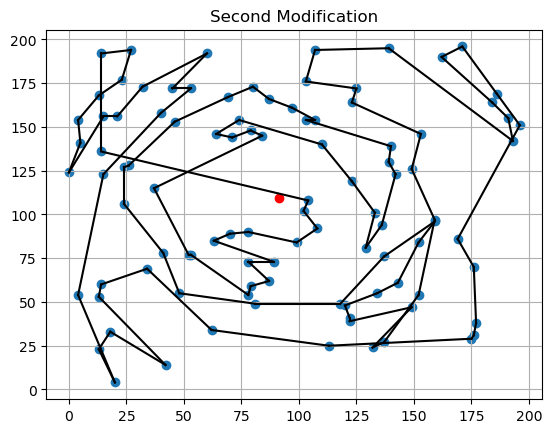

minimum lenght Actual (NN)= 2389.0
time cost to calculate minimum lenght using Modified NN = 0.011 seconds
Rleative error of NN method compared to MST= 48.0802 %


In [10]:
#Distances = []
# for r in np.linspace(1,1001, 20, dtype = int):
#     distNN, timecost7, visit7 = nearest_neighbor_mod(D, r)
#     Distances.append(distNN)
# plt.plot(np.linspace(1,1001, 20, dtype = int), Distances)
# print(Distances.index(min(Distances)), min(Distances))
distNN_mod, timecost7, visit7 = nearest_neighbor_mod(D)
connectpoints(x, y, visit7, 'Second Modification')
print('minimum lenght Actual (NN)=', distNN_mod)
if v<14:
    print('Rleative error of NN method = %.1f %%'%(100*(distNN_mod-min_path)/distNN_mod))
print('time cost to calculate minimum lenght using Modified NN = %.3f seconds' %(timecost7))
print('Rleative error of NN method compared to MST= %.4f %%'%(100*(distNN_mod-calculate_min_spanning_tree_length(x, y))/distNN_mod))


# A compareson over Nn number of samples between nearest neighbor,  NN_square, and NN_distdif mathods using v number of verticies each time.

In [11]:
import math
import numpy as np
from sys import maxsize 
from itertools import permutations
import matplotlib.pyplot as plt


v=100

Na=0
Nb=0
Nc=0
Nd=0

Nn=1000
NN_comp = np.zeros((Nn, 3))
for t in range(Nn):
    x=[]
    y=[]
    for i in range(v):
        x.append(int(10*v*v*np.random.rand()+.5))
        y.append(int(10*v*v*np.random.rand()+.5))
    D =Distances_Matrix(x,y)
    x_bar = np.average(x)
    y_bar = np.average(y)
    #evaluateing distances_to_centroid list
    dcent = Dist_to_center(x,y, x_bar, y_bar)
    #finding the index of the farthest point to the centroid
    m=dcent.index(max(dcent))
    min_spanning_tree_length , timecost2, G, T= calculate_min_spanning_tree_length2(x, y)
    distNN_mod, timecost3, visit7 = nearest_neighbor_mod(D)
    distanceNNcent , timecost4, visit = NearestN_centric(x, y)
    distNN, timecost7, visit7 = nearest_neighbor(D)
    NN_comp[t,0] = distNN_mod/min_spanning_tree_length
    NN_comp[t,1] = distanceNNcent/min_spanning_tree_length
    NN_comp[t,2] = distNN/min_spanning_tree_length
    if NN_comp[t,0]< NN_comp[t,1] and NN_comp[t,0]<NN_comp[t,2]:
        Na+=1
    if NN_comp[t,1]< NN_comp[t,2] and NN_comp[t,1]<NN_comp[t,0]:
        Nb+=1
    if NN_comp[t,2]< NN_comp[t,1] and NN_comp[t,2]<NN_comp[t,0]:
        Nc+=1
    if NN_comp[t,2]==NN_comp[t,1]:
        Nd+=1
    

average0 = np.average(NN_comp[:,0])
average1 = np.average(NN_comp[:,1])
average2 = np.average(NN_comp[:,2])

print('Number of times where Modified Nearest Neighbor method was the best estimator', Na)
print('Number of times where Centric Modification of Nearest Neighbor method was the best estimator', Nb)
print('Number of times where Actual Nearest Neighbor method was the best estimator', Nc)
print(Nd)

print('On Average, Nearest neighbor will give a lenght euqal to %.5f of the MST' %(average0))
print('On Average, Centric Modification of Nearest neighbor will give a lenght euqal to %.5f of the MST' %(average1))
print('On Average, Actual Nearest neighbor will give a lenght euqal to %.5f of the MST' %(average2))


Number of times where Modified Nearest Neighbor method was the best estimator 0
Number of times where Centric Modification of Nearest Neighbor method was the best estimator 440
Number of times where Actual Nearest Neighbor method was the best estimator 552
8
On Average, Nearest neighbor will give a lenght euqal to 1.74492 of the MST
On Average, Centric Modification of Nearest neighbor will give a lenght euqal to 1.44342 of the MST
On Average, Actual Nearest neighbor will give a lenght euqal to 1.43364 of the MST


# Christofides Algorithm

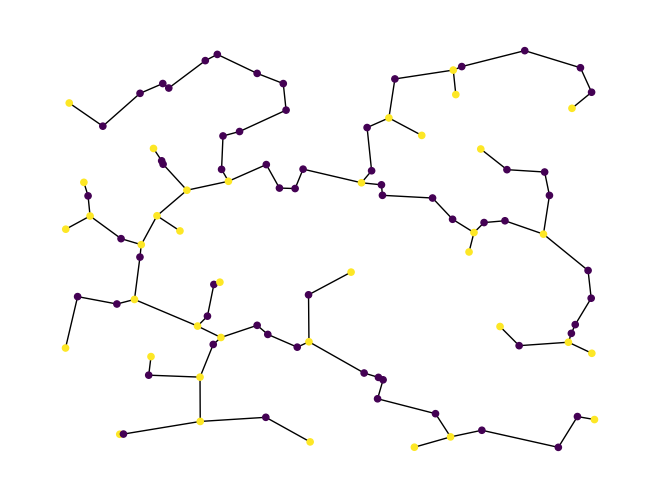

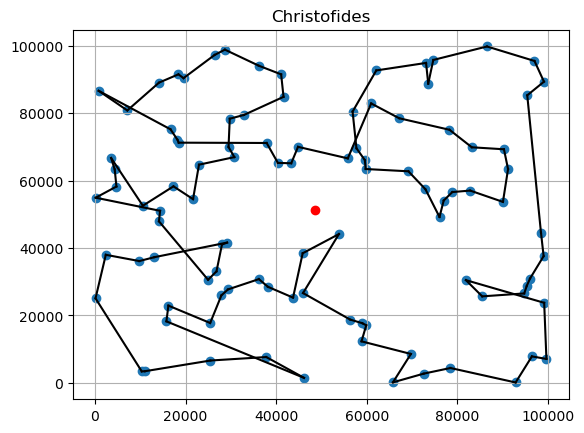

time cost to calculate minimum lenght using Christofides = 0.250 seconds
Christofides minimum length =  886438.0
Rleative error of Christofides method compared to MST= 23.9209 %


In [12]:
distCrhist, timecost, tour = Christofides(x, y)
connectpoints(x, y, tour, 'Christofides')
if v<14:
    print('Rleative error of NN method = %.1f %%'%(100*(distNN-min_path)/distNN))
print('time cost to calculate minimum lenght using Christofides = %.3f seconds' %(timecost))
print('Christofides minimum length = ', distCrhist)
print('Rleative error of Christofides method compared to MST= %.4f %%'%(100*(distCrhist-calculate_min_spanning_tree_length(x, y))/distCrhist))

# Anealing Algorithm:

Intial weight:  1718.55179681782
Minimum weight:  1645.7194491284001
Improvement:  4.24 %


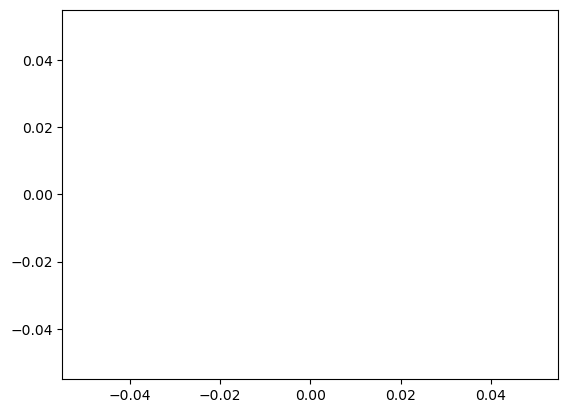

C:\Users\ahmed\anaconda3\Lib\site-packages\matplotlib\animation.py:884: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


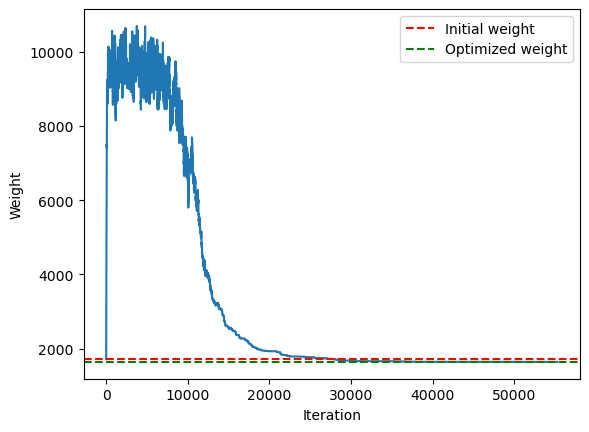

In [13]:
from numpy import append
from nodes_generator import NodeGenerator
from simulated_annealing import SimulatedAnnealing


def main():
    '''set the simulated annealing algorithm params'''
    temp = 10000
    stopping_temp = 0.00000001
    alpha = 0.9995
    stopping_iter = 10000000

    '''set the dimensions of the grid'''
    size_width = 200
    size_height = 200

    '''set the number of nodes'''
    population_size = 100

    '''generate random list of nodes'''
    nodes = NodeGenerator(size_width, size_height, population_size).generate()

    '''run simulated annealing algorithm with 2-opt'''
    sa = SimulatedAnnealing(nodes, temp, alpha, stopping_temp, stopping_iter)
    sa.anneal()

    '''animate'''
    sa.animateSolutions()
    

    '''show the improvement over time'''
    sa.plotLearning()


if __name__ == "__main__":
    main()
    

In [103]:
ys=readanealing('aneal.txt')
dist_aneal = float(ys[0])
timecost_aneal = float(ys[1])
print('minimum lenght (NN)=', dist_aneal)
if v<14:
    print('Rleative error of NN method = %.1f %%'%(100*(dist_aneal-min_path)/dist_aneal))
print('time cost to calculate minimum lenght using Modified NN = %.3f seconds' %(timecost_aneal))
print('Rleative error of NN method compared to MST= %.4f %%'%(100*(dist_aneal-calculate_min_spanning_tree_length(x, y))/dist_aneal))

minimum lenght (NN)= 1639.9539997164384
time cost to calculate minimum lenght using Modified NN = 1.729 seconds
Rleative error of NN method compared to MST= 14.0421 %
